## CareerFoundry Exercise 6.4 Machine Learning

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Loading dataset

path = r'C:\Users\rmr1q.000\Desktop\CareerFoundry\Section 6'
data = pd.read_csv(os.path.join(path, 'Data', 'Basketball Data 2020-2023 CSV.csv'), encoding='unicode_escape')

In [4]:
data['FTA'].mean()

93.87257117035698

In [5]:
data.head(10)

,Rk,Player,Season,Pos,Age,Tm,G,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,Player-additional,Salary,Height,Weight,Country
0,1,James Harden,2020,SG,30,HOU,68,68,2483,672,...,125,60,308,227,2335,hardeja01,38199000.0,195.58,99.790240,United States of America
1,2,Damian Lillard,2020,PG,29,POR,66,66,2474,624,...,70,22,194,114,1978,lillada01,29802321.0,190.50,88.450440,United States of America
2,3,Devin Booker,2020,SG,23,PHO,70,70,2512,627,...,49,18,264,213,1863,bookede01,27285000.0,198.12,93.439952,United States of America
3,4,Giannis Antetokounmpo,2020,PF,25,MIL,63,63,1917,685,...,61,66,230,195,1857,antetgi01,25842697.0,213.36,110.222856,Greece
4,5,Trae Young,2020,PG,21,ATL,60,60,2120,546,...,65,8,289,104,1778,youngtr01,6273000.0,187.96,81.646560,United States of America
5,6,Luka Doncic,2020,PG,20,DAL,61,61,2047,581,...,62,14,260,153,1759,doncilu01,7683360.0,200.66,98.883056,Slovenia
6,7,Bradley Beal,2020,SG,26,WAS,57,57,2053,593,...,71,23,194,126,1741,bealbr01,27093018.0,195.58,93.893544,United States of America
7,8,LeBron James,2020,PG,35,LAL,67,67,2316,643,...,78,36,261,118,1698,jamesle01,37436858.0,205.74,113.398000,United States of America
8,9,Donovan Mitchell,2020,SG,23,UTA,69,69,2364,602,...,70,14,184,172,1655,mitchdo01,3635760.0,190.50,97.522280,United States of America
9,10,Anthony Davis,2020,PF,26,LAL,62,62,2131,551,...,91,143,154,156,1618,davisan02,27093019.0,210.82,114.758776,United States of America


## 3. Cleaning data and checking for extreme values

In [6]:
data.isnull().sum()

Rk                     0
Player                 0
Season                 0
Pos                    0
Age                    0
Tm                     0
G                      0
GS                     0
MP                     0
FG                     0
FGA                    0
FG%                   14
3P                     0
3PA                    0
3P%                  106
2P                     0
2PA                    0
2P%                   29
eFG%                  14
FT                     0
FTA                    0
FT%                  126
ORB                    0
DRB                    0
TRB                    0
AST                    0
STL                    0
BLK                    0
TOV                    0
PF                     0
PTS                    0
Player-additional      0
Salary               247
Height               151
Weight               151
Country              151
dtype: int64

In [7]:
#Removing missing height values

data_nona = data.dropna(subset=['Height'])

In [8]:
#Removing missing FT% values

data_nona = data_nona.dropna(subset=['FT%'])

In [9]:
data_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1942 entries, 0 to 2207
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 1942 non-null   int64  
 1   Player             1942 non-null   object 
 2   Season             1942 non-null   int64  
 3   Pos                1942 non-null   object 
 4   Age                1942 non-null   int64  
 5   Tm                 1942 non-null   object 
 6   G                  1942 non-null   int64  
 7   GS                 1942 non-null   int64  
 8   MP                 1942 non-null   int64  
 9   FG                 1942 non-null   int64  
 10  FGA                1942 non-null   int64  
 11  FG%                1941 non-null   float64
 12  3P                 1942 non-null   int64  
 13  3PA                1942 non-null   int64  
 14  3P%                1871 non-null   float64
 15  2P                 1942 non-null   int64  
 16  2PA                1942 non-n

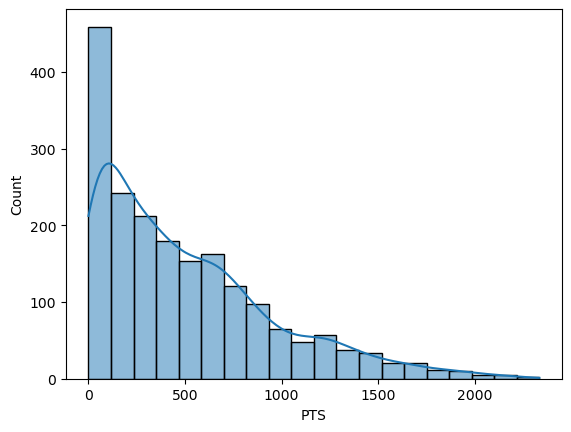

In [33]:
pts_tot = sns.histplot(data_nona['PTS'], bins=20, kde = True)

<Axes: xlabel='TOV', ylabel='Count'>

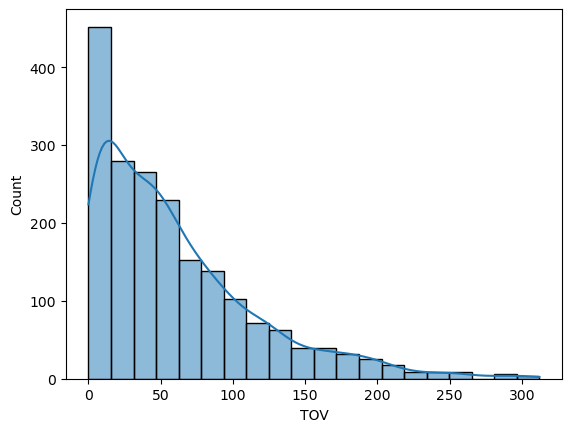

In [11]:
sns.histplot(data_nona['TOV'], bins=20, kde = True)

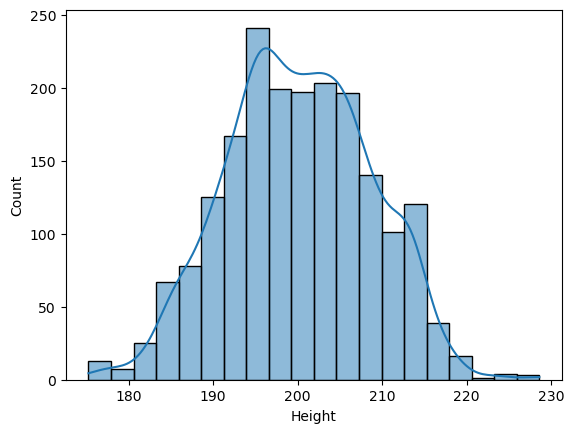

In [34]:
height_dist = sns.histplot(data_nona['Height'], bins=20, kde = True)

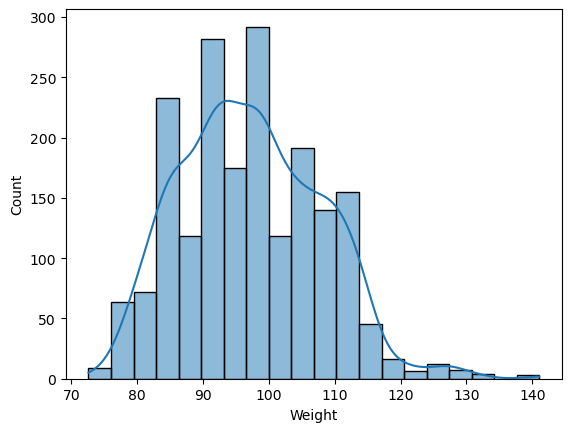

In [35]:
weight_dist = sns.histplot(data_nona['Weight'], bins=20, kde = True)

<Axes: xlabel='eFG%', ylabel='Count'>

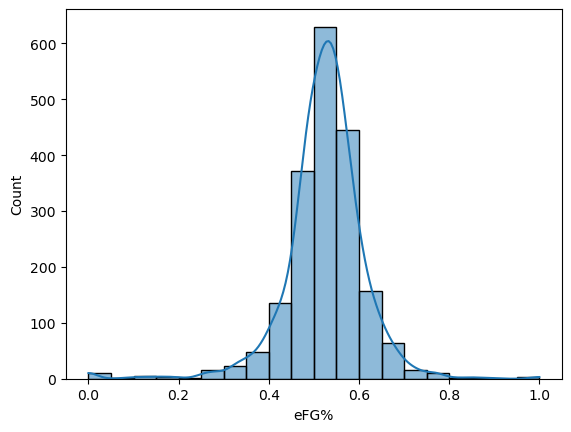

In [14]:
sns.histplot(data_nona['eFG%'], bins=20, kde = True)

In [39]:
# Create a subset of the data with the columns

sub = data_nona[['Age',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Weight', 'Height', 'Salary', 'eFG%']]

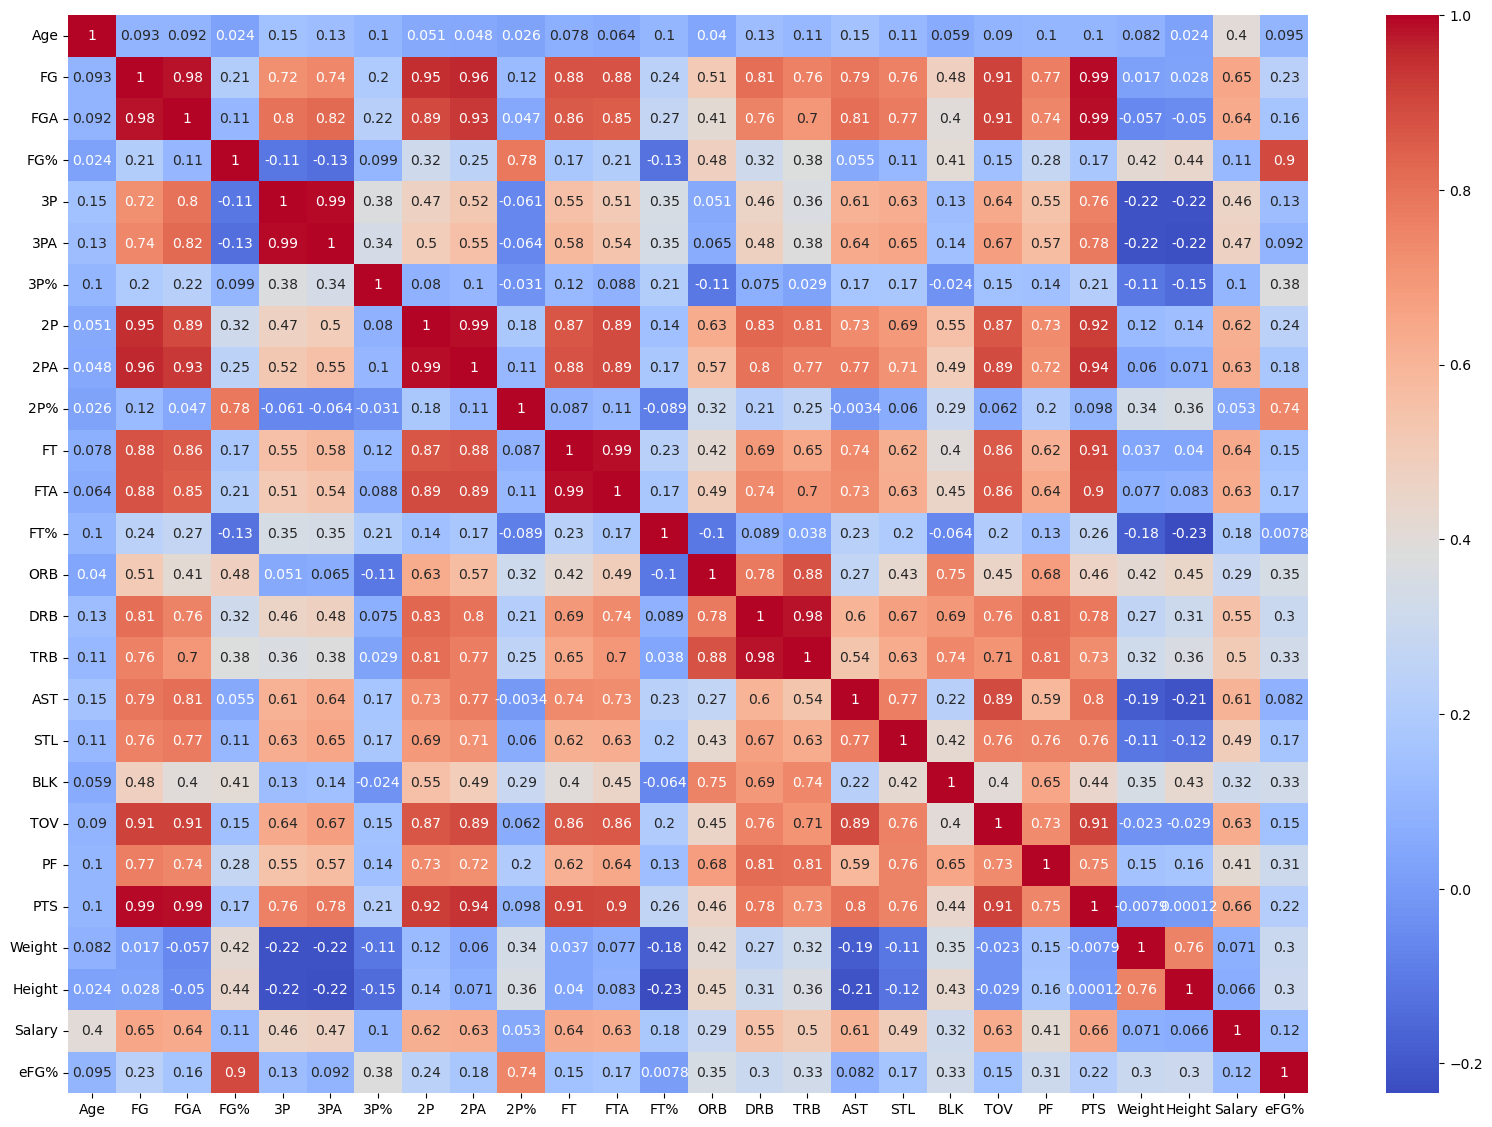

In [45]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(20,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap="coolwarm") # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## 4. Explore scatterplot relationships

<Axes: xlabel='Height'>

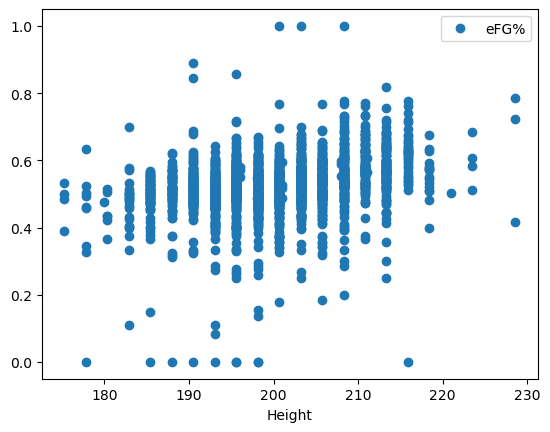

In [15]:
#Create scatterplot
data_nona.plot(x = 'Height', y='eFG%',style='o')

In [16]:
data_nona['Height'].corr(data_nona['eFG%'])

0.30344116162064344

This indicates a weak positive correlation even though I predicted a negative correlation between height and shooting percentage. As a player gets taller their shooting should tend to be worse because they don't have to rely on that skill like the shorter players do to be good. 

The reason why this plot does not accurately show this is because this is calculating the percentage of all shots taken. Bigger players tend to play closer to the hoop in order to make up for their lack of shooting with a closer target. This would explain why there is a slight positive trend here. However, I think there will be a negative trend between height and free throw percentage.

<Axes: xlabel='Height'>

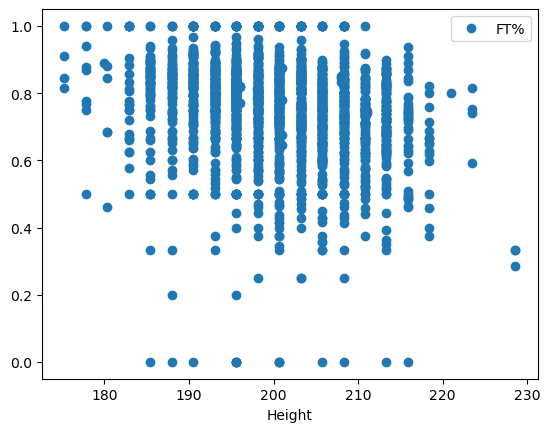

In [17]:
data_nona.plot(x = 'Height', y='FT%',style='o')

In [18]:
data_nona['Height'].corr(data_nona['FT%'])

-0.234093162950117

Indeed there is a slight negative trend when comparing height to free throw percentage. A better way to check the correlation would be to remove outliers that have 100% or 0%. The best way to do this is to create a subset of the data that only includes players who have a minimum of 20 free throws in a season.

In [19]:
free_throws = data_nona[data_nona['FTA'] >= 20]

In [20]:
free_throws['FTA'].describe()

count    1478.000000
mean      130.449256
std       118.169369
min        20.000000
25%        50.000000
50%        92.000000
75%       168.000000
max       803.000000
Name: FTA, dtype: float64

<Axes: xlabel='Height'>

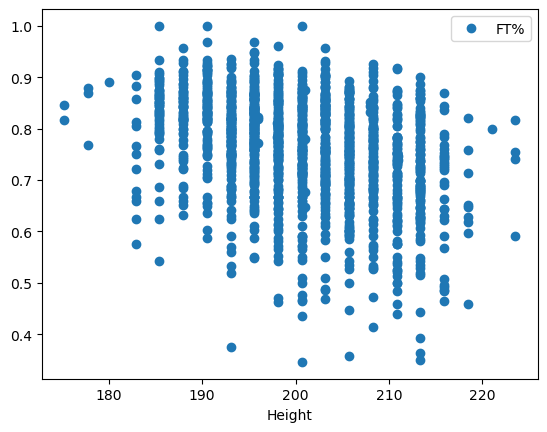

In [21]:
free_throws.plot(x = 'Height', y='FT%',style='o')

In [22]:
free_throws['Height'].corr(free_throws['FT%'])

-0.34995754580451405

This helps the correlation value go from -0.234 to -0.350. Excellent

## 5. Hypothesis

#### Hypothesis

Height has a negative impact on a player's shooting ability.

## 6. Reshaping variables

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = free_throws['Height'].values.reshape(-1,1)
y = free_throws['FT%'].values.reshape(-1,1)

## 7. Split data into training and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 8. Linear regression

In [25]:
#Removing nan values from dataset


In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 9. Create a plot showing regression line on test set

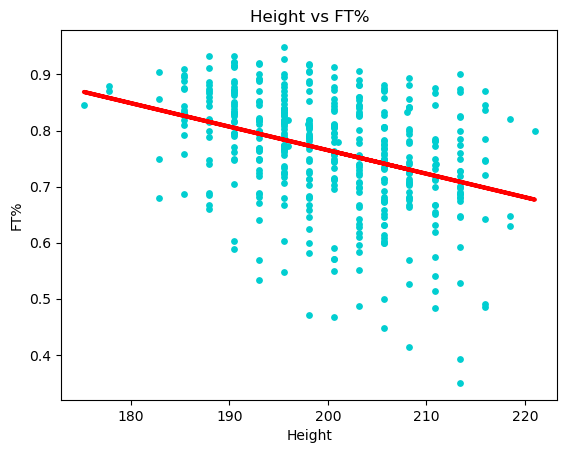

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='darkturquoise', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Height vs FT%')
plot_test.xlabel('Height')
plot_test.ylabel('FT%')
plot_test.show()

## 10. Interpreting line fit strength

I think that the model does an okay job at fitting and predicting the data values of the test set. The biggest issue with having a more accurate model is the variability within the dataset. Players at every height range from around 60% FT% up to around 90%. I think that the overall hypothesis is on the right track because the lowest percentage shooters at each height drop off in a linear fashion. 

A reason for this is likely because not all of the bigger players put the same amount of effort in working on their shooting because they can use their size as a weapon on the court to play well. Smaller players don't have this luxury so they rely more heavily on their shooting. This trend is clearly present when looking at the lowest FT% of each height.

## 11. Checking model performance statistics

In [30]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0041967]]
Mean squared error:  0.008833887673149887
R2 score:  0.14271343594676766


## 12. Comparing predicted y values to test values

In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.795,0.762134
1,0.872,0.762134
2,0.844,0.762134
3,0.800,0.708835
4,0.679,0.730155
5,0.832,0.804772
6,0.570,0.794112
7,0.913,0.762134
8,0.818,0.815432
9,0.790,0.804772


## 13. Final Thoughts

I thought that the model performed quite well despite the low r2 value. The hypothesis that an increase in height leads to a decrease in shooting ability may be on the right track but is definitely not the whole picture. These statistics are from professional basketball players who have access to the best training facilities and coaches for honing their skills. It is clear that there are several players with bigger sizes that are still able to shoot as good as some of the best free throw shooters. A possible reason for the slight negative correlation is not because bigger players have a disadvantage shooting the basketball, but rather because they can choose to practice other things that do not translate directly to being able to shoot a free throw. They have to practice things like rebounding, footwork, weightlifting, post-moves, hook-shots, and several other areas of their game that do not require shooting with form. The lack of time that they spend working on their shooting form could be the reason for this decline in free throw shooting percentage. While this still relates to height and size, it is not a direct correlation; ie. being bigger may not have a physical effect on shooting ability.

There is a possible bias that requires some explanation. 

While importing the data for height, there were several values that were not merged because the player names that were used as keys did not match. The reason for this is that one dataset used special characters and the other used the standard english alphabet. This means that players with special characters in their name who are most likely from foreign countries were more likely to be excluded from the dataset if their height was missing. 

This is a source of selection bias because the selected dataset may not be representative of the entire population that we are trying to represent. 

As someone who follows a bit of basketball, it is common that bigger players from European regions are more skilled in their technical abilities than American players because Europe plays a different style of basketball that puts more emphasis on those abilities. Because of this fact, it is possible that the correlation that was obtained in this analysis is too large because the these bigger and skilled Europeans are not included 

## Saving visualizations

In [48]:
pts_tot.figure.savefig(os.path.join(path, 'Visualizations', 'Point Total Distribution.png'))

In [49]:
weight_dist.figure.savefig(os.path.join(path, 'Visualizations', 'Weight Distribution.png'))

In [50]:
height_dist.figure.savefig(os.path.join(path, 'Visualizations', 'Height Distribution.png'))

In [51]:
corr.figure.savefig(os.path.join(path, 'Visualizations', 'Chloropleth.png'))